# EC7212 – Computer Vision and Image Processing

## Take Home Assignment 2 - Question 2

## EG/2020/4330 - Sheshan K.H.N.

#### [GitHub Repository](https://github.com/Mr-Nithil/EC7212---Computer-Vision-and-Image-Processing-TakeHome-2)

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from collections import deque

In [2]:
# Load the grayscale image and print its dimensions
image_path = os.path.join("..", "task 2","image_02.jpg")
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
height, width = image.shape 
print(f"Dimensions of the image: Height = {height} px, Width = {width} px")

Dimensions of the image: Height = 3265 px, Width = 4898 px


In [3]:
# --- Implementation of region growing algorithm ---
def region_growing(image, initial_seed, tolerance=20):
    height, width = image.shape
    processed = np.zeros_like(image, dtype=np.uint8)
    region_mask = np.zeros_like(image, dtype=np.uint8)

    initial_value = int(image[initial_seed])
    pixel_queue = deque([initial_seed])
    processed[initial_seed] = 1
    region_mask[initial_seed] = 255

    while pixel_queue:
        current_y, current_x = pixel_queue.popleft()
        for delta_y in [-1, 0, 1]:
            for delta_x in [-1, 0, 1]:
                neighbor_y, neighbor_x = current_y + delta_y, current_x + delta_x
                if 0 <= neighbor_y < height and 0 <= neighbor_x < width and not processed[neighbor_y, neighbor_x]:
                    neighbor_value = int(image[neighbor_y, neighbor_x])
                    if abs(neighbor_value - initial_value) <= tolerance:
                        pixel_queue.append((neighbor_y, neighbor_x))
                        processed[neighbor_y, neighbor_x] = 1
                        region_mask[neighbor_y, neighbor_x] = 255

    return region_mask

In [4]:
# Set the seed location for region growing
seed_location = (1200, 1200)

# Perform region growing segmentation
segmentation_result = region_growing(image, initial_seed=seed_location, tolerance=25)

seed_row, seed_col = seed_location

seed_pixel_value = image[seed_row, seed_col]
print(f"Seed pixel value @ {seed_location}: {seed_pixel_value}")

plt.figure(figsize=(8, 4))

Seed pixel value @ (1200, 1200): 234


<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

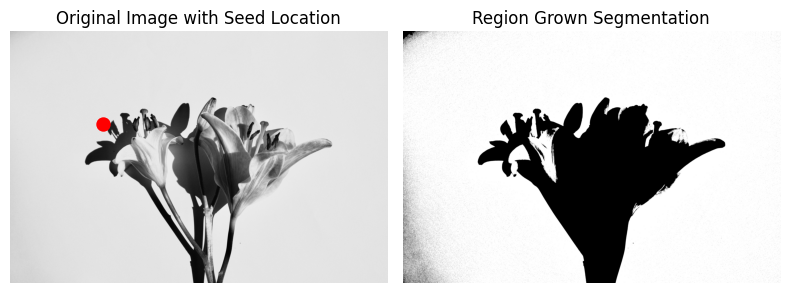

True

In [75]:
plt.figure(figsize=(8, 4))

# Original image with seed annotation
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.scatter(seed_col, seed_row, c='red', s=70, marker='o', linewidths=2)
plt.title("Original Image with Seed Location")
plt.axis('off')

# Segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(segmentation_result, cmap='gray')
plt.title("Region Grown Segmentation")
plt.axis('off')

plt.tight_layout()
plt.show()

output_directory = os.path.join("..", "task 2", "output_images")
os.makedirs(output_directory, exist_ok=True)

cv2.imwrite(os.path.join(output_directory, "region_growing_result.jpg"), segmentation_result)